In [23]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# MPC import
from LinearMPC_deliverable_3_3.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from src.vel_rocket_vis import plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [29]:
Ts = 0.05
sim_time = 20
H = 10
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)

delta2_s (trim) = 0.0
du bounds = -0.2617993877991494 0.2617993877991494
=> abs bounds = -0.2617993877991494 0.2617993877991494
['A', 'H', 'b']
['A', 'H', 'b']
Simulating time 0.00: u_x: [0.]
u_y: [-0.26179343]
u_z: [39.99999986]
u_roll: [0.]

Simulating time 0.05: u_x: [0.]
u_y: [-0.26178367]
u_z: [40.00003113]
u_roll: [0.]

Simulating time 0.10: u_x: [0.]
u_y: [0.2489909]
u_z: [40.00002401]
u_roll: [0.]

Simulating time 0.15: u_x: [0.]
u_y: [0.26142003]
u_z: [40.00002995]
u_roll: [0.]

Simulating time 0.20: u_x: [0.26179939]
u_y: [0.02530967]
u_z: [40.00002274]
u_roll: [0.]

 State alpha violation: 0.17 > 0.17, 
Simulating time 0.25: u_x: [0.26179484]
u_y: [-0.02197175]
u_z: [40.00002915]
u_roll: [0.]

 State alpha violation: 0.17 > 0.17, 
Simulating time 0.30: u_x: [-0.24807807]
u_y: [0.0163863]
u_z: [40.00002188]
u_roll: [0.]

Simulating time 0.35: u_x: [-0.25873936]
u_y: [-0.00998765]
u_z: [40.00002894]
u_roll: [0.]

 State alpha violation: 0.17 > 0.17, 
Simulating time 0.40: u_x:

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x1779ef860>,
 'scene_objects': {'rocket_actor': Actor (0x15dd952a0)
    Center:                     (50.32007, 49.9984915, 100.58848449999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    4.936E+01, 5.128E+01
    Y Bounds                    4.879E+01, 5.121E+01
    Z Bounds

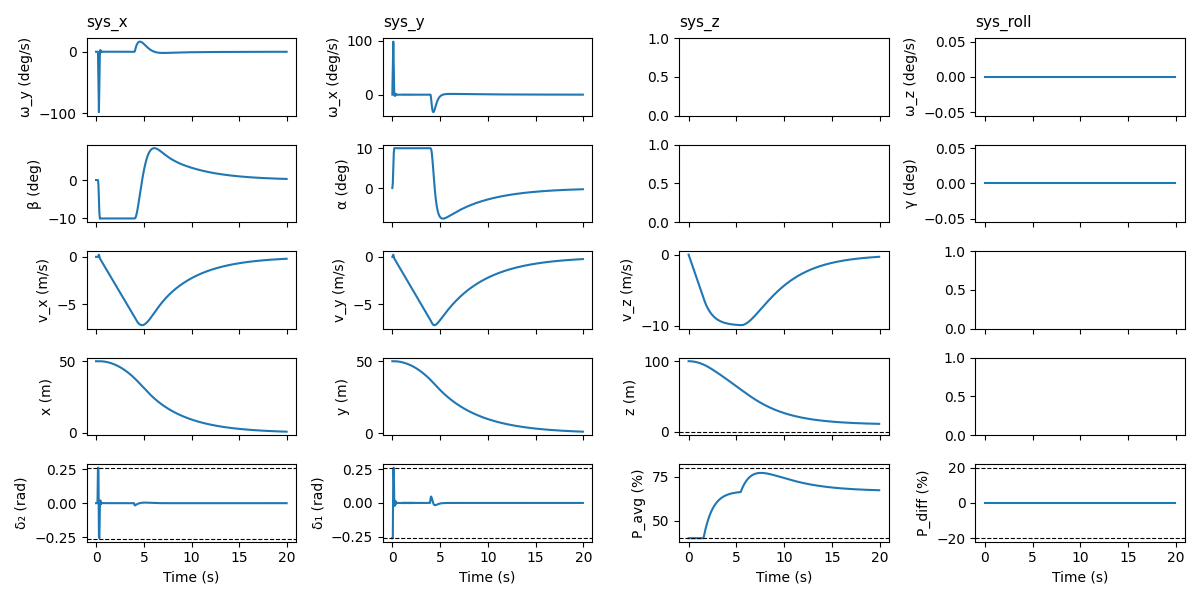

In [30]:
plot_static_states_inputs(
    T=t_cl[:-1],      
    X=x_cl[:, :-1],   
    U=u_cl,           
    Ref=None,
    type="vel"
)

